In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *

In [182]:
# to print everything
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [185]:
# read csv into memory, later just query sql table
dt = pd.read_csv('bet365_outcome_features.csv')
dt

,Unnamed: 0,match_id,league,home_team,away_team,outcome,closing_odds_outcome,home_opening,home_closing,home_opening_minus_closing,...,draw_opening_minus_closing,draw_min,draw_max,draw_range,away_opening,away_closing,away_opening_minus_closing,away_min,away_max,away_range
0,1,1005111,Singapore: S.League,Geylang,Hougang,draw,3.40,2.50,3.10,-0.60,...,0.00,3.30,3.40,0.10,2.50,2.00,0.50,2.00,2.50,0.50
1,2,1005112,Singapore: S.League,Warriors,Albirex Niigata,away,2.25,2.75,2.75,0.00,...,0.00,3.50,3.50,0.00,2.25,2.25,0.00,2.25,2.25,0.00
2,3,1005151,Croatia: 1. HNL,D. Zagreb,Osijek,home,1.14,1.11,1.14,-0.03,...,2.50,6.00,8.50,2.50,21.00,14.00,7.00,14.00,21.00,7.00
3,4,1005152,Czech Republic: Division 2,Ceske Budejovice,Usti nad Labem,away,4.00,1.75,1.73,0.02,...,0.00,3.50,3.50,0.00,4.00,4.00,0.00,3.75,4.00,0.25
4,5,1005153,Denmark: Superliga,Sonderjyske,Odense,home,2.45,2.00,2.45,-0.45,...,0.00,3.40,3.40,0.00,3.60,2.80,0.80,2.80,3.60,0.80
5,6,1005168,Austria: Erste Liga,LASK Linz,Neustadt,draw,4.75,1.29,1.29,0.00,...,0.50,4.75,5.50,0.75,13.00,13.00,0.00,11.00,19.00,8.00
6,7,1005169,Austria: Erste Liga,St. Polten,Liefering,home,2.10,2.45,2.10,0.35,...,0.00,3.75,3.75,0.00,2.55,3.10,-0.55,2.55,3.10,0.55
7,8,1005170,Austria: Erste Liga,Wacker Innsbruck,FAC Wien,draw,4.50,1.44,1.36,0.08,...,0.25,4.50,5.50,1.00,6.50,9.00,-2.50,6.50,9.00,2.50
8,9,1005246,Czech Republic: Synot liga,Jablonec,Mlada Boleslav,away,4.33,1.62,1.62,0.00,...,0.05,3.75,4.00,0.25,5.50,4.33,1.17,4.33,5.75,1.42
9,10,1005248,Austria: Erste Liga,A. Klagenfurt,A. Salzburg,draw,3.75,2.10,1.83,0.27,...,0.00,3.60,3.75,0.15,3.20,4.00,-0.80,3.20,4.20,1.00


In [190]:
# Create drop down boxes
options = np.unique(dt['league'])
master = Tk()
master.title('Pick the league')
variable = StringVar(master)
variable.set(options[0]) # default value
w = OptionMenu(master, variable, *options)
w.pack()
mainloop()
league = variable.get()
df = dt[dt['league'] == league]

options = np.unique(df['home_team'])
master = Tk()
master.title('Pick a team')
variable = StringVar(master)
variable.set(options[0]) # default value
w = OptionMenu(master, variable, *options)
w.pack()
mainloop()
team1 = variable.get()

options = np.unique(df['home_team'])
master = Tk()
master.title('Pick another team')
variable = StringVar(master)
variable.set(options[0]) # default value
w = OptionMenu(master, variable, *options)
w.pack()
mainloop()
team2 = variable.get()

''

''

''

In [191]:
team1
team2
dt1 = dt[(dt.home_team == team1) & (dt.away_team == team2)]
dt2 = dt[(dt.home_team == team2) & (dt.away_team == team1)]
df = pd.concat([dt1, dt2])
df
#team = dt[(dt.home_team == team1 and dt.away_team == team2) or (dt.home_team == team2 and dt.away_team == team1)]
#team

'Chelsea'

'Manchester United'

,Unnamed: 0,match_id,league,home_team,away_team,outcome,closing_odds_outcome,home_opening,home_closing,home_opening_minus_closing,...,draw_opening_minus_closing,draw_min,draw_max,draw_range,away_opening,away_closing,away_opening_minus_closing,away_min,away_max,away_range
6844,6845,1824812,England: Premier League,Chelsea,Manchester United,draw,3.25,2.15,2.05,0.10,...,0.05,3.25,3.3,0.05,3.90,3.8,0.10,3.8,3.9,0.1
22524,22525,56389467,England: Premier League,Chelsea,Manchester United,home,2.05,2.20,2.05,0.15,...,-0.15,3.25,3.4,0.15,3.75,3.5,0.25,3.5,3.8,0.3
5205,5206,1552967,England: Premier League,Manchester United,Chelsea,draw,3.30,2.55,2.50,0.05,...,0.00,3.20,3.3,0.10,3.10,2.9,0.20,2.9,3.1,0.2


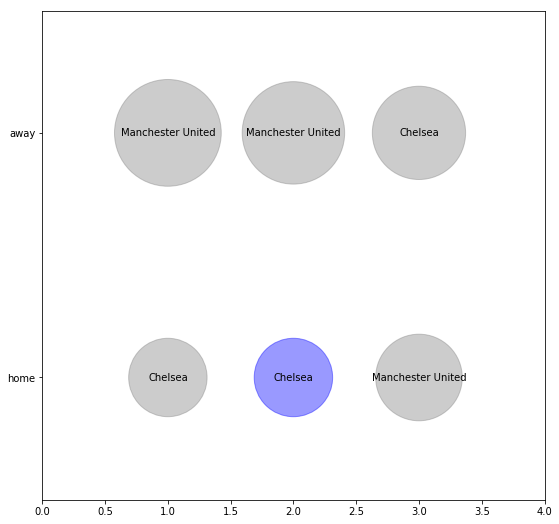

In [192]:
n_games = df['home_team'].size

# x is integers from 1 to n_games for home teams then 1 to n_games for away
x = np.concatenate([np.linspace(1, n_games, n_games)]*2)

# y is home_teams first at y=1 then away teams at y=y_height
y_height = 3
y = np.concatenate([np.ones(n_games), y_height*np.ones(n_games)])

# sizes of bubbles are odds of each team
sizes = np.concatenate([df['home_closing'], df['away_closing']])

# names of teams
team_names = np.concatenate([df['home_team'], df['away_team']])

# colors is the color of each bubble where team1 = blue and team2  = red 
colors = ['grey']*n_games*2
i = 0 # i is the row of df
while i < n_games:
    outcome = df['outcome'].values[i]
    if outcome == 'home':
        team = df['home_team'].values[i]
        if team == team1:
            colors[i] = 'blue'
        else:
            colors[i] = 'red'
    elif outcome == 'away':
        team = df['away_team'].values[i]
        if team == team1:
            colors[n_games + i] = 'blue'
        else:
            colors[n_games + i] = 'red'
    i = i+1

# Make plot = p
p = plt.scatter(x,y, s = sizes*1000*(6-n_games), c = colors, alpha = 0.4)
p = plt.xlim(0, n_games + 1)
p = plt.ylim(0,y_height + 1)
p = plt.yticks([1, y_height], ['home', 'away'])
plt.rcParams["figure.figsize"] = [9,9]
#plt.show()

# add text to each point to plot p
i = 0
while i < n_games*2:
    p = plt.text(x[i], y[i], team_names[i], 
             horizontalalignment='center', 
             verticalalignment='center')
    i = i+1
plt.show()
#p.plt.text(0.5, 0.5, 'matplotlib', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)